# MultinominalNB

In [22]:
import pickle
from pprint import pprint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


Load data

In [23]:
# Dataframe
path_df = "../Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "../Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "../Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "../Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "../Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [24]:
print(features_train.shape)
print(features_test.shape)

(14111, 1000)
(6048, 1000)


## Hyperparameter tuning with cross-validation

In [25]:
classifier = MultinomialNB()
pprint(classifier.get_params())

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


## Hyperparameter tuning with Randomized Search Cross Validatio

In [29]:
classifier = MultinomialNB()
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
random_search = RandomizedSearchCV(classifier, parameters,n_jobs = -1, cv= 3, scoring='accuracy')
random_search.fit(features_train, labels_train)

RandomizedSearchCV(cv=3, estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0005, 0.0001, 0.005,
                                                  0.001, 0.05, 0.01, 0.1, 0.5,
                                                  1, 5, 10, 50, 100]},
                   scoring='accuracy')

Let see the result of Hyperparameter tuning

In [30]:
print("The best hyperparameters after Random Search cross-validation are:")
pprint(random_search.best_params_)
print("The accuracy of a model is:")
print(random_search.best_score_)

The best hyperparameters after Random Search cross-validation are:
{'alpha': 0.05}
The accuracy of a model is:
0.8139747003769968


In [56]:
best_alpha = 0.05

## Model training and evaluation

In [57]:
classifier = MultinomialNB(alpha = best_alpha)

In [58]:
classifier.fit(features_train, labels_train)

MultinomialNB(alpha=0.05)

In [59]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, classifier.predict(features_train)))

The training accuracy is: 
0.8337467224151371


In [60]:
# Test accuracy
predictions = classifier.predict(features_test)
print("The test accuracy is: ")
print(accuracy_score(labels_test, predictions))

The test accuracy is: 
0.814318783068783


In [61]:
# Classification report
print("Classification report")
print(classification_report(labels_test,predictions))

Classification report
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       561
           1       0.87      0.81      0.84       441
           2       0.74      0.70      0.72       712
           3       0.79      0.82      0.81       750
           4       0.95      0.86      0.90      1131
           5       0.72      0.79      0.75       961
           6       0.90      0.91      0.90       753
           7       0.79      0.75      0.77       739

    accuracy                           0.81      6048
   macro avg       0.81      0.81      0.81      6048
weighted avg       0.82      0.81      0.82      6048



## Confusion matrix
Create confusion matrix to visualize what are the errors of algorithum

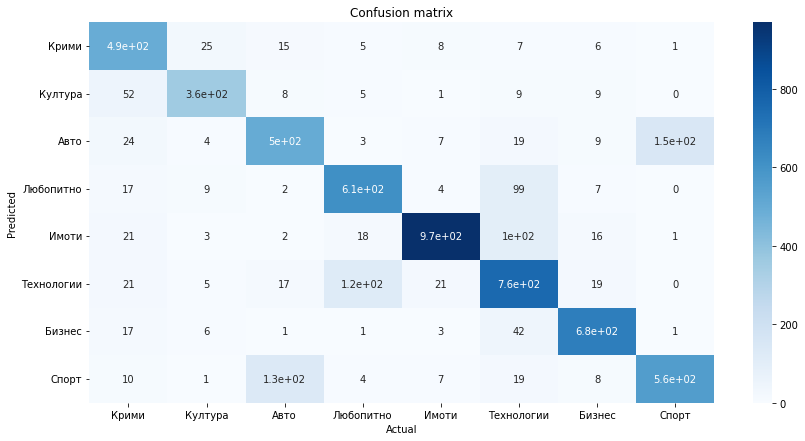

In [63]:
conf_matrix = confusion_matrix(labels_test, predictions)
plt.figure(figsize=(14,7))
plt.title('Confusion matrix')

sns.heatmap(
    conf_matrix, 
    xticklabels=df['topic'].unique(), 
    yticklabels=df['topic'].unique(),
    cmap="Blues",
    annot=True,
)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()